<a href="https://colab.research.google.com/github/stuthiudupa/Capstone/blob/main/DCGAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

AC GAN implementation

Click on Run all

Dataset automatically gets downloaded upon running this program from the kaggle dataset link.

Link to dataset: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia

(If you get an error while running DCGAN, open the dcgan.py (/content/MedImageGAN/models/dcgan.py) file and on line 49 change nd to ndf)

In [ ]:
!git clone https://github.com/AlexisMolinaMR/MedImageGAN.git

Cloning into 'MedImageGAN'...
remote: Enumerating objects: 178, done.
remote: Counting objects: 100% (178/178), done.
remote: Compressing objects: 100% (149/149), done.
remote: Total 178 (delta 89), reused 81 (delta 23), pack-reused 0
Receiving objects: 100% (178/178), 57.09 KiB | 2.20 MiB/s, done.
Resolving deltas: 100% (89/89), done.


In [ ]:
!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

Dataset URL: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia
License(s): other
 99% 2.28G/2.29G [00:24<00:00, 139MB/s]
100% 2.29G/2.29G [00:24<00:00, 99.1MB/s]


In [ ]:
import zipfile
import os

# Define the path to the downloaded ZIP file and the directory where you want to extract it
zip_file_path = "chest-xray-pneumonia.zip"
extracted_dir_path = "chest-xray-pneumonia"

# Create the extraction directory if it doesn't exist
os.makedirs(extracted_dir_path, exist_ok=True)

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_dir_path)

print(f"Files extracted to: {extracted_dir_path}")


Files extracted to: chest-xray-pneumonia


In [ ]:
!pip install torch torchvision PyYAML numpy piqa

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

In [ ]:
!mkdir output

In [ ]:
content = """
arch: 'DCGAN'

path: '/content/chest-xray-pneumonia/chest_xray/chest_xray/test'
out: '/content/output/images'
run: 'name'
seed: 42
n_gpu: 0

num_epochs: 300
learning_rate: 0.0002
beta_adam: 0.5
batch_size: 16

latent_vector: 256

image_size: 64
loader_workers: 2
number_channels: 3
gen_feature_maps: 64
dis_feature_maps: 64
"""

# Specify the filename
filename = '/content/MedImageGAN/input.yaml'

# Write the content to the file
with open(filename, 'w') as file:
    file.write(content)

print(f"File '{filename}' created and content added.")


File '/content/MedImageGAN/input.yaml' created and content added.


In [ ]:
20l;;-+!python3 /content/MedImageGAN/image_generator.py /content/MedImageGAN/input.yaml

Generator(
  (main): Sequential(
    (0): ConvTranspose2d(256, 512, kernel_size=(4, 4), stride=(1, 1), bias=False)
    (1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): ConvTranspose2d(512, 256, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (4): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): ConvTranspose2d(256, 128, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (7): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (8): ReLU(inplace=True)
    (9): ConvTranspose2d(128, 64, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (10): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): ReLU(inplace=True)
    (12): ConvTranspose2d(64, 3, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (13): Tanh()
  )
)


In [ ]:
from google.colab import files

# Download the image to your local machine
files.download('/content/output/imagesname_real_fake_grid.png')



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

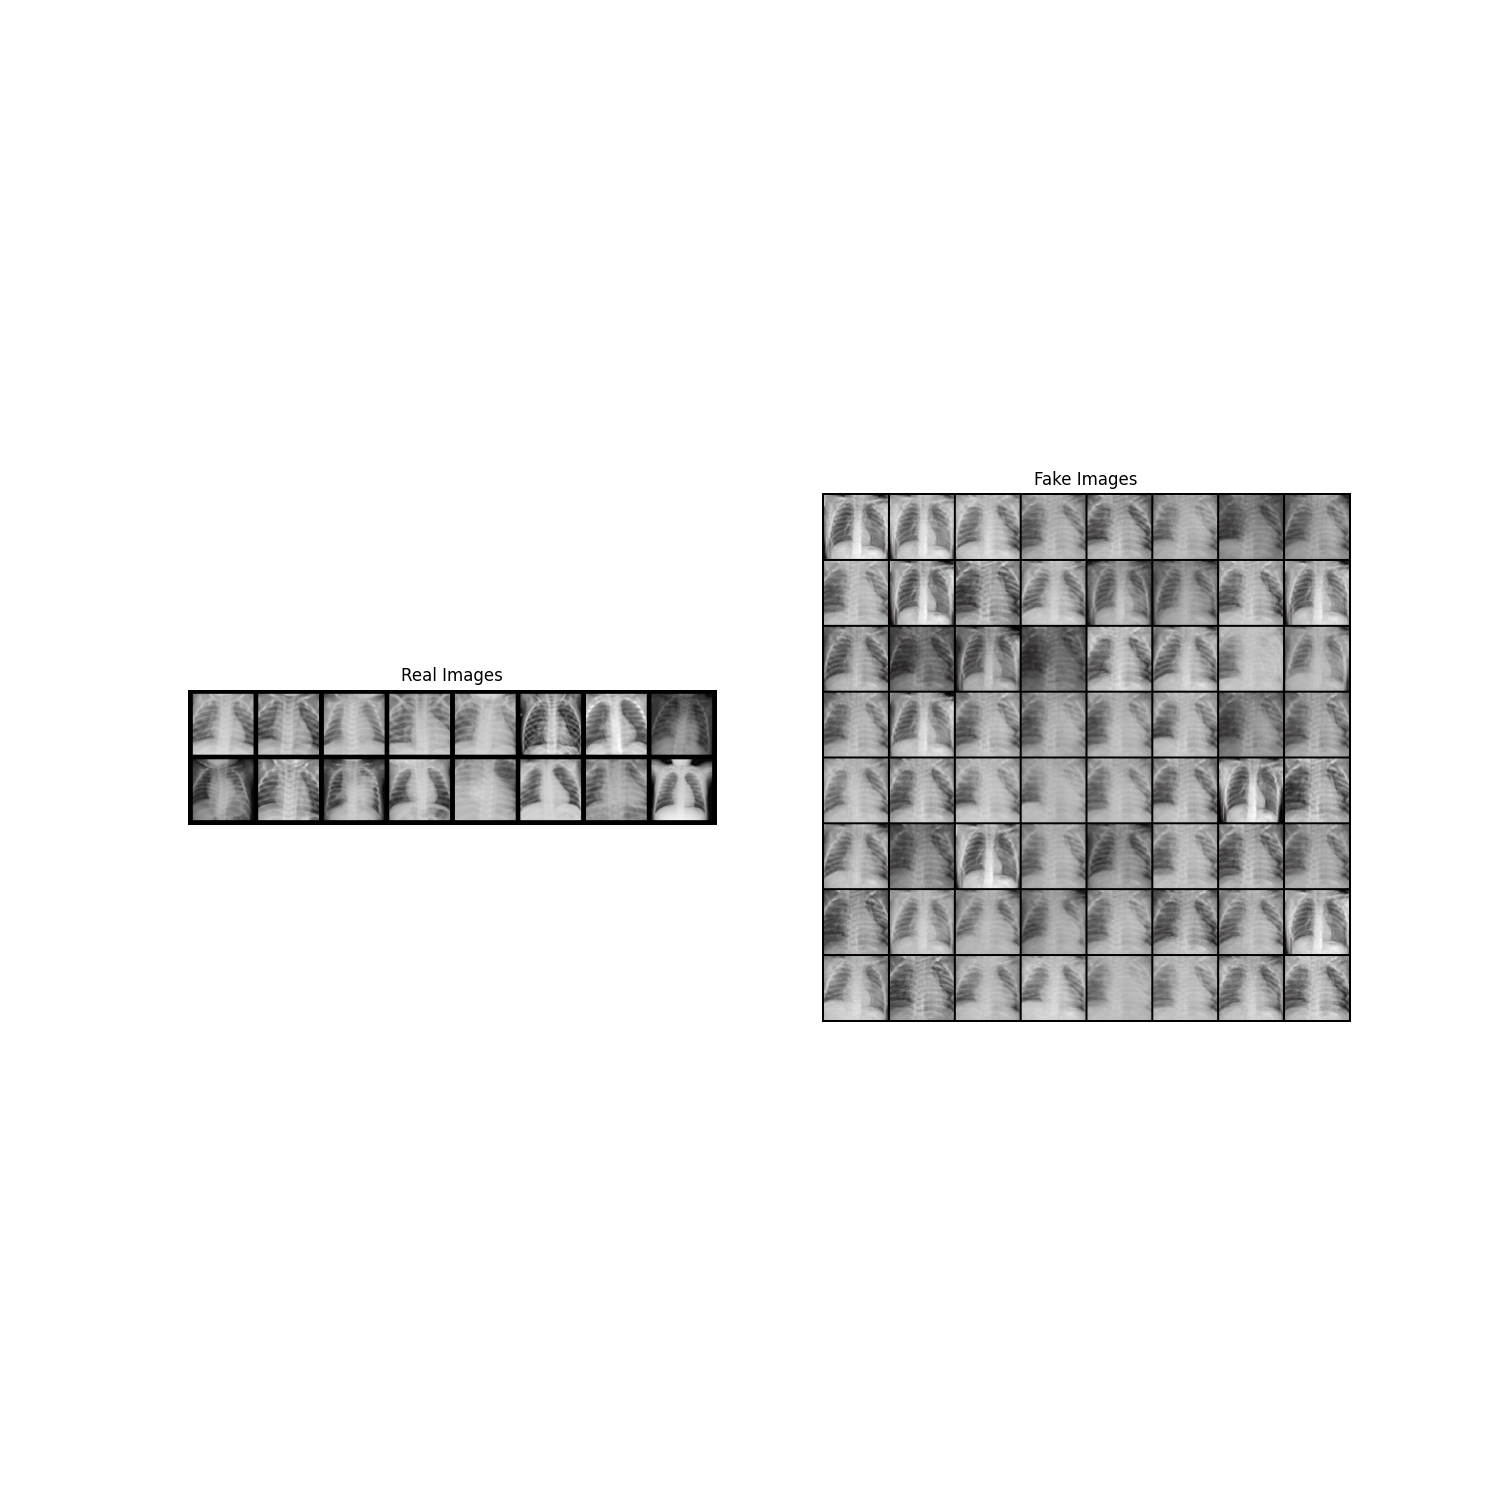

In [ ]:
from IPython.display import Image, display

# Display the image
display(Image('/content/output/imagesname_real_fake_grid.png'))


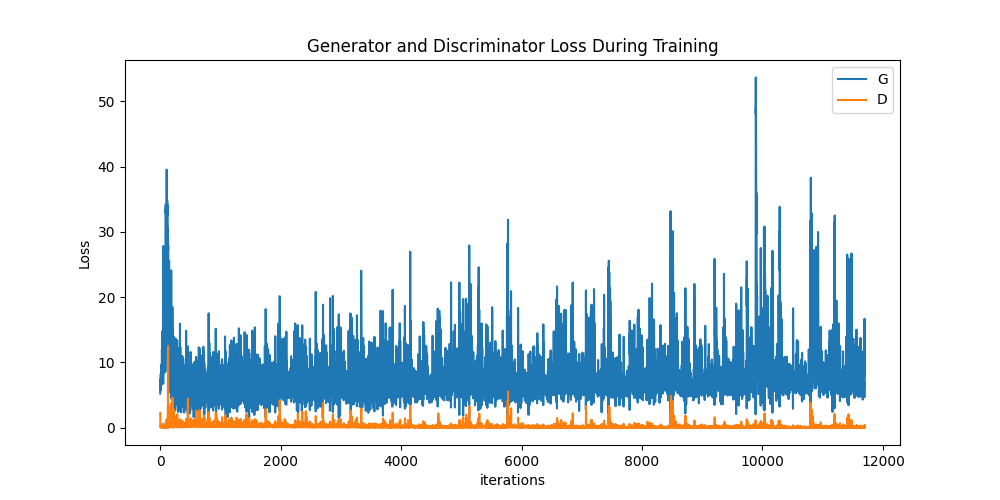

In [ ]:
from IPython.display import Image, display

# Display the image
display(Image('/content/output/imagesname_loss_plot.png'))
